# Rapport - Labb 3

## Metod

I denna rapport ska jag kort och enkelt gå igenom hur jag klassificerar datan i unlabelled_data.csv. Målet är att dela upp datan så jämnt som möjligt genom att dra en linje genom klustren av punkter enligt formeln **y = kx + m**. Sen ska vi testa tre andra linjer för att se vilken som delar klustern bäst.
Jag valde linjen y = -1x + 0 som min linje, de andra tre är:
- *f(x) = -0.489x*
- *g(x) = -2x + 0.16*
- *h(x) = 800x - 120*h

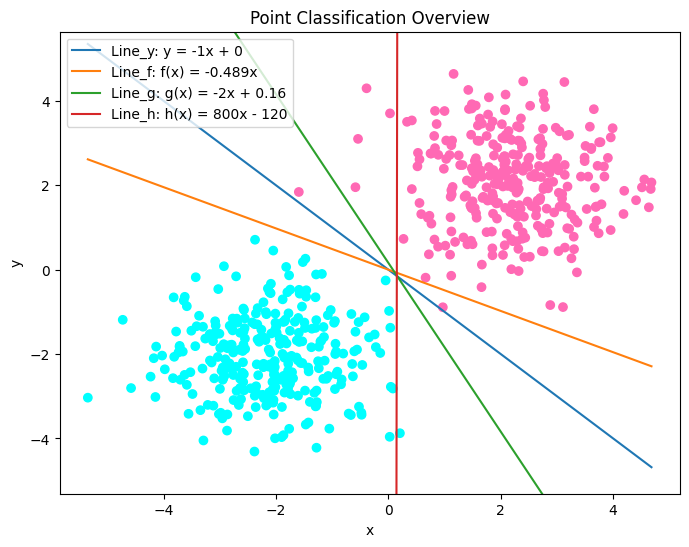

Differences in classification relative to Line_y
Line_f: 1 points differ from Line_y
Line_g: 1 points differ from Line_y
Line_h: 6 points differ from Line_y

Count of above (pink) points per line
Line_y: 302 pink points out of 600
Line_f: 301 pink points out of 600
Line_g: 301 pink points out of 600
Line_h: 298 pink points out of 600


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Läs in CSV-fil med koordinater 
df = pd.read_csv("unlabelled_data.csv", names=["x_val", "y_val"])
n_total = len(df)

#  Funktion för att avgöra om punkt ligger ovanför eller under en linje 
def is_above(y_point, y_line, flip_sign=False):
    return int(y_point < y_line) if flip_sign else int(y_point > y_line)

#  Samling av linjära funktioner i dictionary 
lines = {
    "Line_y": {"expr": lambda x: -1 * x, "invert": False, "label": "Line_y: y = -1x + 0"},
    "Line_f": {"expr": lambda x: -0.489 * x, "invert": False, "label": "Line_f: f(x) = -0.489x"},
    "Line_g": {"expr": lambda x: -2 * x + 0.16, "invert": False, "label": "Line_g: g(x) = -2x + 0.16"},
    "Line_h": {"expr": lambda x: 800 * x - 120, "invert": True, "label": "Line_h: h(x) = 800x - 120"},}

#  Klassificera punkter för varje linje 
for key, info in lines.items():
    df[f"cls_{key}"] = df.apply(lambda row: is_above(row["y_val"], info["expr"](row["x_val"]), flip_sign=info["invert"]),axis=1)

# Färgkarta baserat på första linjens klassificering 
colors = np.where(df["cls_Line_y"] == 1, "hotpink", "cyan")

# Rita punkterna och alla linjer 
x_limits = np.array([df["x_val"].min(), df["x_val"].max()])

plt.figure(figsize=(8, 6))
plt.scatter(df["x_val"], df["y_val"], c=colors)

for key, info in lines.items():
    plt.plot(x_limits, info["expr"](x_limits), label=info["label"])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Point Classification Overview")
plt.legend()
plt.ylim(df["y_val"].min() - 1, df["y_val"].max() + 1)
plt.show()


# Funktion för att rita en specifik linje med dess färgning
def display_line(line_key, color_line="black"):
    labels = df[f"cls_{line_key}"]
    color_map = ["hotpink" if val == 1 else "cyan" for val in labels]
    plt.scatter(df["x_val"], df["y_val"], c=color_map)
    plt.plot(x_limits, lines[line_key]["expr"](x_limits), color=color_line, label=lines[line_key]["label"])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Classification using {line_key}")
    plt.legend()
    plt.ylim(df["y_val"].min() - 1, df["y_val"].max() + 1)
    plt.show()


# Utskrifter av klassificeringsjämförelser
print("Differences in classification relative to Line_y")
for other in ["Line_f", "Line_g", "Line_h"]:
    diff_count = np.sum(df[f"cls_{other}"] != df["cls_Line_y"])
    print(f"{other}: {diff_count} points differ from Line_y")

print("\nCount of above (pink) points per line")
for key in lines.keys():
    total_pink = np.sum(df[f"cls_{key}"])
    print(f"{key}: {total_pink} pink points out of {n_total}")


Här kan man se hur de olika linjerna skär grafen och indelningen av punkter:

Som man kan utläsa nedan så är *f-linjens* och *g-linjens* separering väldigt lik min egna linje, även snäppet bättre medans *h-linjen* varierar mest.

#### Differences in classification relative to Line_y:
- **Line_f:** *1 points differ from Line_y*
- **Line_g:** *1 points differ from Line_y*
- **Line_h:** *6 points differ from Line_y*

#### Count of above (pink) points per line:
- **Line_y:** *302 pink points out of 600*
- **Line_f:** *301 pink points out of 600*
- **Line_g:** *301 pink points out of 600*
- **Line_h:** *298 pink points out of 600*

## Slutsats

Dom som separerar det bäst (om man är ute efter en separering på 50/50) är *f- och g-linjerna*, tätt följt av min egna linje, största variationen kommer från *h-linjen* där det skiljer 6 punkter men detta är efter att vi inverterat den linjen så att den ger samma färger som de andra. Utan detta hade dom skilt sig avsevärt mer då 1or hade blivit 0or och tvärtom. Detta kanske inte påverkar så mycket om målet är att separera efter 50/50 men hade vi klassificerat efter säg pikachu/pichu som i LABB 2 hade det påverkat klassificeringen väldigt mycket.
Men då målet är att separera grupperna så jämnt som möjligt (50/50) blir *f- och g-linjerna* klart dom bästa på det.

**Vilken är bäst?** Det är enkelt att se att en linje som *h-linjen*, alltså en positiv linje, är den sämsta på att separera klustren, det är uppenbart att en linje som är negativ bättre kommer att separera klustren och av de linjer vi har så är både *g* och *f* dom bästa linjerna. Den bästa linjen vore om man kunde hitta en som separerar klustren perfekt på 300/300. 
